# 🎲 Quebra-Gelo: Probabilidades para Aprendizado por Reforço

## 🎯 Objetivo da Aula
Relembrar conceitos básicos de probabilidade de forma prática e divertida, preparando o terreno para entender como a **incerteza** e a **aleatoriedade** são fundamentais no Aprendizado por Reforço.

## 🎮 Warm-up: O Jogo dos Dados

### Pergunta Inicial: "Qual resultado é mais provável?"
Vamos começar com uma pergunta simples para ativar o pensamento probabilístico:

**Ao lançar dois dados, qual soma tem maior probabilidade de ocorrer?**
- A) 6
- B) 7  
- C) 8
- D) Todas têm a mesma probabilidade

In [37]:
import random
import matplotlib.pyplot as plt
from collections import Counter

# Vamos descobrir empiricamente!
def experimento_dois_dados(n_lancamentos=1000):
    somas = []
    
    for _ in range(n_lancamentos):
        dado1 = random.randint(1, 6)
        dado2 = random.randint(1, 6)
        somas.append(dado1 + dado2)
    
    # Contar frequências
    contagem = Counter(somas)
    
    print("🎲 RESULTADOS DO EXPERIMENTO:")
    print(f"Após {n_lancamentos} lançamentos...")
    
    for soma in sorted(contagem.keys()):
        freq = contagem[soma]
        prob = freq / n_lancamentos
        print(f"Soma {soma}: {freq} vezes ({prob:.3f})")
    
    # Visualizar
    plt.figure(figsize=(8, 4))
    somas_ordenadas = sorted(contagem.keys())
    frequencias = [contagem[s] for s in somas_ordenadas]
    
    plt.bar(somas_ordenadas, frequencias, alpha=0.7, color='skyblue')
    plt.title(f'Distribuição das Somas - {n_lancamentos} lançamentos')
    plt.xlabel('Soma dos Dados')
    plt.ylabel('Frequência')
    plt.grid(True, alpha=0.3)
    
    # Destacar o mais frequente
    mais_frequente = max(contagem, key=contagem.get)
    plt.bar(mais_frequente, contagem[mais_frequente], color='red', alpha=0.8, 
            label=f'Mais frequente: {mais_frequente}')
    plt.legend()
    plt.show()
    
    print(f"\n🏆 Soma mais frequente: {mais_frequente}")
    return contagem

🎲 RESULTADOS DO EXPERIMENTO:
Após 12 lançamentos...
Soma 2: 1 vezes (0.083)
Soma 3: 1 vezes (0.083)
Soma 4: 1 vezes (0.083)
Soma 5: 2 vezes (0.167)
Soma 6: 1 vezes (0.083)
Soma 7: 4 vezes (0.333)
Soma 8: 1 vezes (0.083)
Soma 9: 1 vezes (0.083)


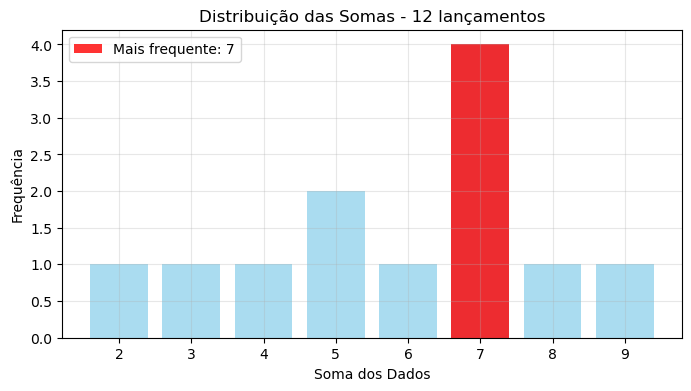


🏆 Soma mais frequente: 7


In [39]:
# Execute o experimento
resultados = experimento_dois_dados(12)

**🤔 Por que o 7 ganha?**
- Existem mais maneiras de fazer 7: (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)
- Para fazer 2: apenas (1,1)
- Para fazer 12: apenas (6,6)

## 🏆 Conceito #1: Nem Tudo é Igualmente Provável

### Exemplo Clássico: A Porta dos Prêmios (Problema de Monty Hall)

In [26]:
def monty_hall_simulation(n_jogos=1000, trocar_porta=True):
    """
    Simula o famoso Problema de Monty Hall
    """
    vitorias = 0
    
    for _ in range(n_jogos):
        # Configurar o jogo
        portas = [0, 0, 0]  # 0 = cabra, 1 = carro
        porta_premiada = random.randint(0, 2)
        portas[porta_premiada] = 1
        
        # Jogador escolhe uma porta
        escolha_inicial = random.randint(0, 2)
        
        # Apresentador abre uma porta com cabra (que não é a escolhida)
        portas_disponiveis = [i for i in range(3) 
                             if i != escolha_inicial and portas[i] == 0]
        porta_aberta = random.choice(portas_disponiveis)
        
        # Decisão: trocar ou manter?
        if trocar_porta:
            # Trocar para a porta restante
            porta_final = [i for i in range(3) 
                          if i != escolha_inicial and i != porta_aberta][0]
        else:
            # Manter escolha original
            porta_final = escolha_inicial
        
        # Verificar vitória
        if portas[porta_final] == 1:
            vitorias += 1
    
    taxa_vitoria = vitorias / n_jogos
    estrategia = "TROCANDO" if trocar_porta else "MANTENDO"
    
    print(f"🚪 Estratégia: {estrategia}")
    print(f"🎯 Taxa de vitória: {taxa_vitoria:.3f} ({taxa_vitoria*100:.1f}%)")
    
    return taxa_vitoria

In [27]:
print("🎪 PROBLEMA DE MONTY HALL")
print("=" * 30)
print("Você está em um game show. Há 3 portas:")
print("🚪 Atrás de uma: um carro 🚗")  
print("🚪 Atrás das outras: cabras 🐐🐐")
print("\nVocê escolhe uma porta. O apresentador abre uma das")
print("outras portas, sempre revelando uma cabra.")
print("Agora ele pergunta: 'Quer trocar de porta?'\n")

# Simular ambas estratégias
taxa_mantendo = monty_hall_simulation(10000, trocar_porta=False)
print()
taxa_trocando = monty_hall_simulation(10000, trocar_porta=True)

print(f"\n💡 CONCLUSÃO:")
print(f"Trocar é {taxa_trocando/taxa_mantendo:.1f}x melhor que manter!")

🎪 PROBLEMA DE MONTY HALL
Você está em um game show. Há 3 portas:
🚪 Atrás de uma: um carro 🚗
🚪 Atrás das outras: cabras 🐐🐐

Você escolhe uma porta. O apresentador abre uma das
outras portas, sempre revelando uma cabra.
Agora ele pergunta: 'Quer trocar de porta?'

🚪 Estratégia: MANTENDO
🎯 Taxa de vitória: 0.337 (33.7%)

🚪 Estratégia: TROCANDO
🎯 Taxa de vitória: 0.669 (66.9%)

💡 CONCLUSÃO:
Trocar é 2.0x melhor que manter!


## 🎯 Conceito #2: Probabilidade Condicional

### Exemplo Prático: Sistema de Spam

In [41]:
def detector_spam():
    """
    Demonstra probabilidade condicional com detecção de spam
    """
    print("📧 DETECTOR DE SPAM")
    print("=" * 20)
    
    # Dados fictícios mas realistas
    prob_spam = 0.3  # 30% dos emails são spam
    prob_palavra_dado_spam = 0.8  # "GRÁTIS" aparece em 80% dos spams
    prob_palavra_dado_ham = 0.05  # "GRÁTIS" aparece em 5% dos emails legítimos
    
    print(f"📊 Dados conhecidos:")
    print(f"• P(Spam) = {prob_spam:.1%}")
    print(f"• P('GRÁTIS' | Spam) = {prob_palavra_dado_spam:.1%}")
    print(f"• P('GRÁTIS' | Ham) = {prob_palavra_dado_ham:.1%}")
    
    # Calcular P(Spam | "GRÁTIS") usando Teorema de Bayes
    prob_ham = 1 - prob_spam
    
    # P("GRÁTIS") = P("GRÁTIS"|Spam) * P(Spam) + P("GRÁTIS"|Ham) * P(Ham)
    prob_palavra = (prob_palavra_dado_spam * prob_spam + 
                   prob_palavra_dado_ham * prob_ham)
    
    # P(Spam | "GRÁTIS") = P("GRÁTIS" | Spam) * P(Spam) / P("GRÁTIS")
    prob_spam_dado_palavra = (prob_palavra_dado_spam * prob_spam) / prob_palavra
    
    print(f"\n🧮 Cálculo (Teorema de Bayes):")
    print(f"P(Spam | 'GRÁTIS') = {prob_spam_dado_palavra:.3f} = {prob_spam_dado_palavra:.1%}")
    
    print(f"\n💡 Interpretação:")
    if prob_spam_dado_palavra > 0.5:
        print(f"Email com 'GRÁTIS' tem {prob_spam_dado_palavra:.1%} chance de ser spam!")
        print("🚨 ALTO RISCO - Provavelmente vai para pasta de spam")
    else:
        print(f"Email com 'GRÁTIS' tem apenas {prob_spam_dado_palavra:.1%} chance de ser spam")
        print("✅ BAIXO RISCO - Provavelmente é legítimo")

In [42]:
detector_spam()

📧 DETECTOR DE SPAM
📊 Dados conhecidos:
• P(Spam) = 30.0%
• P('GRÁTIS' | Spam) = 80.0%
• P('GRÁTIS' | Ham) = 5.0%

🧮 Cálculo (Teorema de Bayes):
P(Spam | 'GRÁTIS') = 0.873 = 87.3%

💡 Interpretação:
Email com 'GRÁTIS' tem 87.3% chance de ser spam!
🚨 ALTO RISCO - Provavelmente vai para pasta de spam


## 🎲 Conceito #3: Urnas e Dependência

### Mini-Experimento: Netflix e Probabilidades

In [ ]:
def netflix_recomendacao():
    """
    Simula como o Netflix pode usar probabilidades para recomendar filmes
    """
    print("🎬 SISTEMA DE RECOMENDAÇÃO NETFLIX")
    print("=" * 35)
    
    # Perfil do usuário (baseado no histórico)
    historico = ['Ação', 'Ação', 'Comédia', 'Ação', 'Drama', 'Ação', 'Sci-Fi']
    
    print("📚 Seu histórico:", ' → '.join(historico))
    
    # Calcular preferências
    from collections import Counter
    contagem = Counter(historico)
    total = len(historico)
    
    print(f"\n📊 Suas preferências estimadas:")
    for genero, count in contagem.most_common():
        prob = count / total
        print(f"• {genero}: {prob:.1%} ({count}/{total})")
    
    # Simular recomendações baseadas nas probabilidades
    print(f"\n🎯 Próximas 10 recomendações:")
    generos = list(contagem.keys())
    probabilidades = [contagem[g]/total for g in generos]
    
    import numpy as np
    recomendacoes = np.random.choice(generos, size=10, p=probabilidades)
    
    for i, rec in enumerate(recomendacoes, 1):
        print(f"{i:2d}. Filme de {rec}")
    
    # Verificar se faz sentido
    rec_contagem = Counter(recomendacoes)
    print(f"\n✅ Verificação:")
    for genero in generos:
        esperado = probabilidades[generos.index(genero)] * 10
        obtido = rec_contagem[genero]
        print(f"• {genero}: esperado ≈ {esperado:.1f}, obtido = {obtido}")

In [44]:
netflix_recomendacao()

🎬 SISTEMA DE RECOMENDAÇÃO NETFLIX
📚 Seu histórico: Ação → Ação → Comédia → Ação → Drama → Ação → Sci-Fi

📊 Suas preferências estimadas:
• Ação: 57.1% (4/7)
• Comédia: 14.3% (1/7)
• Drama: 14.3% (1/7)
• Sci-Fi: 14.3% (1/7)

🎯 Próximas 10 recomendações:
 1. Filme de Sci-Fi
 2. Filme de Ação
 3. Filme de Sci-Fi
 4. Filme de Sci-Fi
 5. Filme de Ação
 6. Filme de Comédia
 7. Filme de Sci-Fi
 8. Filme de Ação
 9. Filme de Ação
10. Filme de Ação

✅ Verificação:
• Ação: esperado ≈ 5.7, obtido = 5
• Comédia: esperado ≈ 1.4, obtido = 1
• Drama: esperado ≈ 1.4, obtido = 0
• Sci-Fi: esperado ≈ 1.4, obtido = 4


## 🚀 Por Que Isso Importa para RL?

### Conexão com Aprendizado por Reforço

In [45]:
def preview_rl():
    """
    Mostra como as probabilidades aparecem em RL
    """
    print("🤖 PROBABILIDADES NO APRENDIZADO POR REFORÇO")
    print("=" * 45)
    
    print("🎯 Onde você vai encontrar probabilidades em RL:")
    print()
    
    exemplos = [
        ("🎲 Estados Aleatórios", "O ambiente pode ser estocástico"),
        ("🎯 Políticas", "π(a|s) = probabilidade de ação a no estado s"),
        ("🔍 Exploração", "ε-greedy: às vezes escolha aleatória"),
        ("🎰 Bandits", "Múltiplas opções com recompensas incertas"),
        ("📊 Estimação", "Valores Q têm incerteza"),
        ("🎪 Thompson Sampling", "Amostra da distribuição de crenças")
    ]
    
    for emoji_conceito, explicacao in exemplos:
        print(f"{emoji_conceito}: {explicacao}")
    
    print(f"\n💡 MENSAGEM PRINCIPAL:")
    print("RL é sobre tomar decisões com INCERTEZA!")
    print("Probabilidades nos ajudam a:")
    print("• Modelar incerteza")
    print("• Balancear exploração vs. exploração")  
    print("• Quantificar confiança nas estimativas")

In [46]:
preview_rl()

🤖 PROBABILIDADES NO APRENDIZADO POR REFORÇO
🎯 Onde você vai encontrar probabilidades em RL:

🎲 Estados Aleatórios: O ambiente pode ser estocástico
🎯 Políticas: π(a|s) = probabilidade de ação a no estado s
🔍 Exploração: ε-greedy: às vezes escolha aleatória
🎰 Bandits: Múltiplas opções com recompensas incertas
📊 Estimação: Valores Q têm incerteza
🎪 Thompson Sampling: Amostra da distribuição de crenças

💡 MENSAGEM PRINCIPAL:
RL é sobre tomar decisões com INCERTEZA!
Probabilidades nos ajudam a:
• Modelar incerteza
• Balancear exploração vs. exploração
• Quantificar confiança nas estimativas


## 🧠 Quiz Rápido: Teste Seu Conhecimento

In [47]:
def quiz_interativo():
    """
    Quiz rápido para engajar a turma
    """
    print("🧠 QUIZ RELÂMPAGO")
    print("=" * 20)
    
    perguntas = [
        {
            "pergunta": "Em um baralho de 52 cartas, qual a probabilidade de tirar um Rei?",
            "opcoes": ["A) 1/13", "B) 1/4", "C) 4/52", "D) A e C estão corretas"],
            "resposta": "D",
            "explicacao": "4 reis em 52 cartas = 4/52 = 1/13"
        },
        {
            "pergunta": "Se P(Chuva) = 0.3 e P(Guarda-chuva | Chuva) = 0.9, qual P(Chuva E Guarda-chuva)?",
            "opcoes": ["A) 0.27", "B) 0.3", "C) 0.9", "D) 1.2"],
            "resposta": "A", 
            "explicacao": "P(A ∩ B) = P(B|A) × P(A) = 0.9 × 0.3 = 0.27"
        },
        {
            "pergunta": "No problema de Monty Hall, qual a probabilidade de ganhar trocando?",
            "opcoes": ["A) 1/3", "B) 1/2", "C) 2/3", "D) Depende da sorte"],
            "resposta": "C",
            "explicacao": "Ao trocar, você ganha sempre que a escolha inicial estava errada (2/3 das vezes)"
        }
    ]
    
    print("Responda mentalmente e depois veremos as respostas!\n")
    
    for i, q in enumerate(perguntas, 1):
        print(f"❓ Pergunta {i}:")
        print(f"{q['pergunta']}")
        for opcao in q['opcoes']:
            print(f"   {opcao}")
        print()
    
    print("⏰ Tempo para pensar... (10 segundos)")
    print("\n" + "="*50)
    print("📝 GABARITO:")
    
    for i, q in enumerate(perguntas, 1):
        print(f"\n{i}. Resposta: {q['resposta']}")
        print(f"   💡 {q['explicacao']}")

In [48]:
quiz_interativo()

🧠 QUIZ RELÂMPAGO
Responda mentalmente e depois veremos as respostas!

❓ Pergunta 1:
Em um baralho de 52 cartas, qual a probabilidade de tirar um Rei?
   A) 1/13
   B) 1/4
   C) 4/52
   D) A e C estão corretas

❓ Pergunta 2:
Se P(Chuva) = 0.3 e P(Guarda-chuva | Chuva) = 0.9, qual P(Chuva E Guarda-chuva)?
   A) 0.27
   B) 0.3
   C) 0.9
   D) 1.2

❓ Pergunta 3:
No problema de Monty Hall, qual a probabilidade de ganhar trocando?
   A) 1/3
   B) 1/2
   C) 2/3
   D) Depende da sorte

⏰ Tempo para pensar... (10 segundos)

📝 GABARITO:

1. Resposta: D
   💡 4 reis em 52 cartas = 4/52 = 1/13

2. Resposta: A
   💡 P(A ∩ B) = P(B|A) × P(A) = 0.9 × 0.3 = 0.27

3. Resposta: C
   💡 Ao trocar, você ganha sempre que a escolha inicial estava errada (2/3 das vezes)


## 🏠 Mini-Tarefa para Casa

**Desafio da Semana**: Observe uma situação do cotidiano onde probabilidades estão envolvidas e pense:

1. 🎯 **Identifique**: Qual é o evento aleatório?
2. 🤔 **Estime**: Quais são as probabilidades envolvidas?
3. 📊 **Analise**: Como você poderia coletar dados para verificar?

**Exemplos de inspiração**:
- Tempo de espera no elevador
- Probabilidade de chuva vs. previsão do tempo
- Taxa de acerto do seu GPS
- Recomendações do Spotify/YouTube

**💡 Compartilhe na próxima aula**: Sua observação mais interessante!

---

*🎉 Parabéns! Você acabou de dar o primeiro passo para dominar o Aprendizado por Reforço. Lembre-se: no mundo do RL, a incerteza não é um problema - é uma característica fundamental que precisamos abraçar e modelar!*